# ● Download the Dataset

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [34]:
batch_size = 16

# ● Image Augmentation

In [35]:
data_aug = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [36]:
os.listdir("D:\IBM\IBM\Flowers-Dataset")

['flowers']

In [37]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "D:\IBM\IBM\Flowers-Dataset",
  validation_split=0.25,
  subset="training",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 1 classes.
Using 3238 files for training.


In [38]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
 "D:\IBM\IBM\Flowers-Dataset",
  validation_split=0.25,
  subset="validation",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 1 classes.
Using 1079 files for validation.


In [39]:
class_names = train_data.class_names

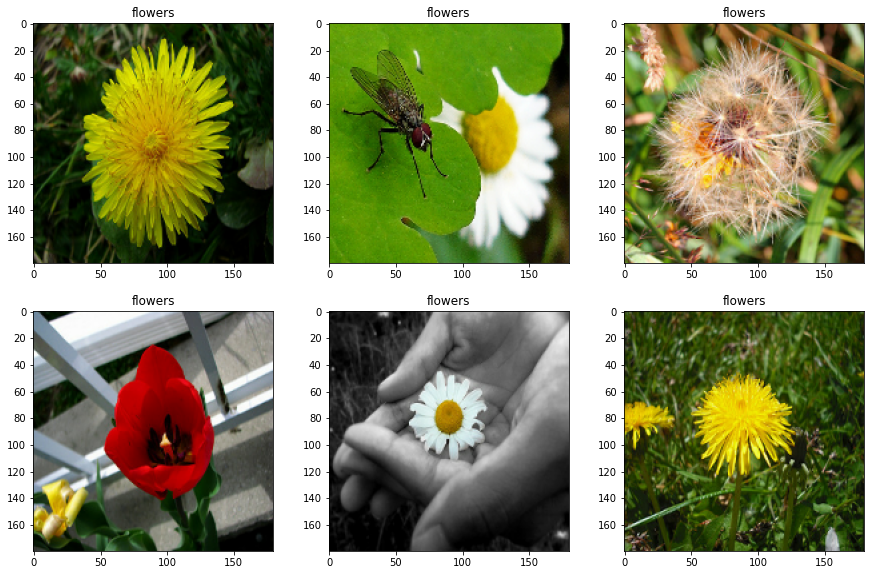

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [41]:
normalization_layer = layers.Rescaling(1./255)

In [42]:
dataset_normalized = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


# ● Create Model

# ● Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)

In [43]:
num_classes = len(class_names)

model = Sequential([
  data_aug,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# ● Compile The Model

In [44]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# ● Fit The Model

In [45]:
epochs=15
history = model.fit(train_data,validation_data=val_data_set,epochs=epochs)

Epoch 1/15
203/203 [==============================] - 328s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/15
203/203 [==============================] - 304s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/15
203/203 [==============================] - 303s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/15
203/203 [==============================] - 311s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/15
203/203 [==============================] - 308s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/15
203/203 [==============================] - 304s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/15
203/203 [==============================] - 298s 1s/step - loss: 0.0000e+00 - accura

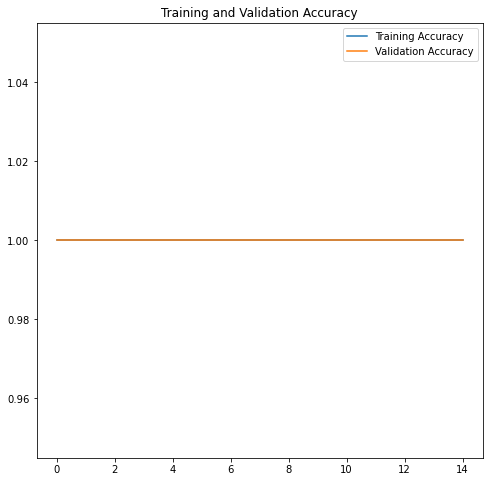

In [46]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

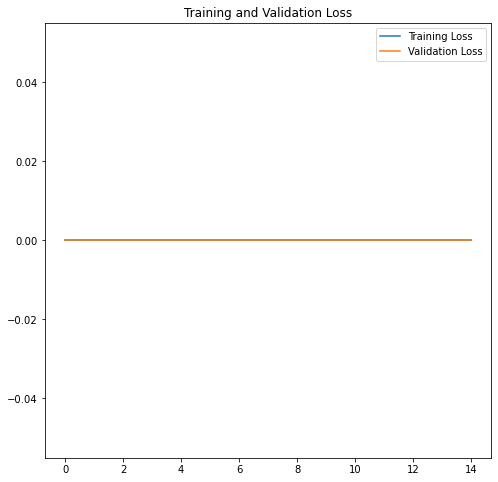

In [47]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# ● Save The Model

In [48]:
model.save("./flowers.h5")

In [49]:
model.load_weights('./flowers.h5')

# ● Test The Model

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np

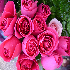

In [51]:
img=image.load_img('D:/IBM/IBM/Flowers-Dataset/flowers/rose/1469726748_f359f4a8c5.jpg',target_size=(70,70))
img